In [1]:
import bz2
import dill as pickle
import pandas as pd
import csv
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "scens_2020-01-20.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    scenarios = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([scenarios])
#print(dict.keys(scenarios))
WindScenarios=scenarios['Wind']['309_WIND_1']+scenarios['Wind']['303_WIND_1']+scenarios['Wind']['122_WIND_1']+scenarios['Wind']['317_WIND_1']
#print(WindScenarios)
SolarAsset=['320_PV_1', '314_PV_1', '314_PV_2', '313_PV_1', '314_PV_3', '314_PV_4', '313_PV_2', '310_PV_1', '324_PV_1', '312_PV_1', '310_PV_2', '324_PV_2', '324_PV_3', '113_PV_1', '319_PV_1', '215_PV_1', '102_PV_1', '101_PV_1', '102_PV_2', '104_PV_1', '101_PV_2', '101_PV_3', '101_PV_4', '103_PV_1', '119_PV_1']
#print(len(SolarAsset))
SolarScenarios=scenarios['Solar'][SolarAsset[0]]
for i in range(1,25):
    SolarScenariosNew=scenarios['Solar'][SolarAsset[i]]
    SolarScenarios=SolarScenarios+SolarScenariosNew
#print(SolarScenarios)
LoadScenarios=scenarios['Load']['1']+scenarios['Load']['2']+scenarios['Load']['3']

Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment. We try to make the relationship between wind scenarios and vatic output. We consider the aggregated solar, wind and load assets.

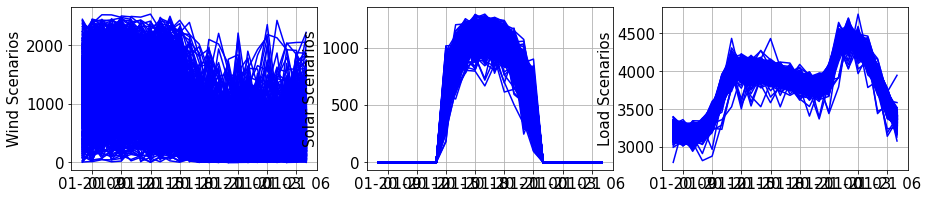

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios",fontsize=15)
plt.plot(WindScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios",fontsize=15)
plt.plot(SolarScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios",fontsize=15)
plt.plot(LoadScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

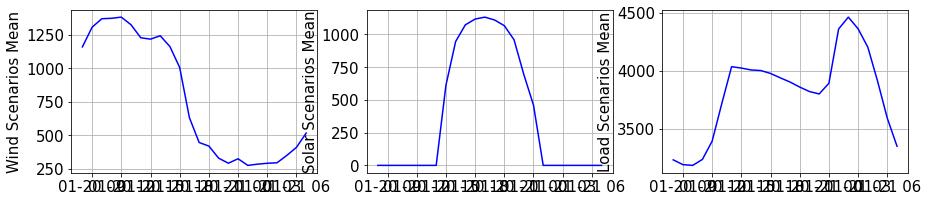

In [3]:
from numpy import mean
WindMean = mean(WindScenarios)
SolarMean = mean(SolarScenarios)
LoadMean = mean(LoadScenarios)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios Mean",fontsize=15)
plt.plot(WindMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios Mean",fontsize=15)
plt.plot(SolarMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios Mean",fontsize=15)
plt.plot(LoadMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

In this case we consider only the wind scenarios to understand relationship between the scenarios with the vatic output.

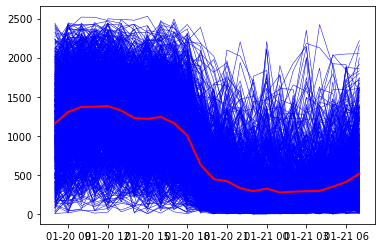

In [4]:
DifferenceLoadWindSolar=WindScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
plt.show()

We consider only those scenarios which always are below the thresold (the mean) For those scenarios the generation cost is high.

The indices of scenarios those are always below the thresold [12, 192, 286, 443, 485, 539, 587, 885, 905, 927, 949]


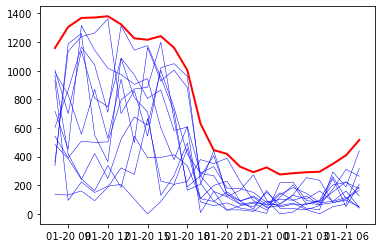

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
index=[]
time=WindScenarios.keys()
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x < 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print("The indices of scenarios those are always below the thresold",index)
plt.show()

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output. We consider that case where all load, wind and solar are stochastic. The distribution of generation cost, load shedding and renewable curtailment are shown.

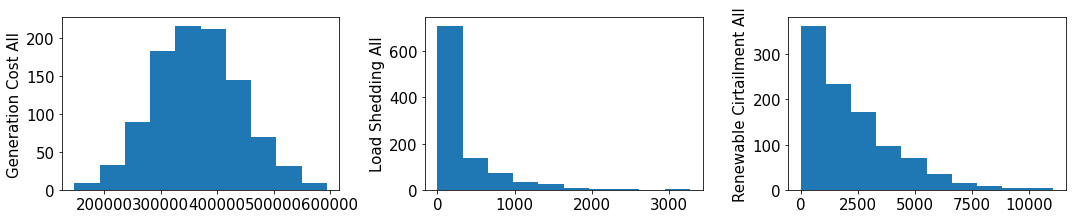

In [6]:
import bz2
import dill as pickle
import pandas as pd
import csv
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "daily_summary.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    day_scens = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([day_scens])
#print(dict.keys(day_scens))
LoadSheddingAll=day_scens[()]['Load shedding']
#print(LoadShedding)
GenerationCostAll=day_scens[()]['Generation costs']
#print(GenerationCost)
RenewableCurtailmentAll=day_scens[()]['Renewables curtailment']
#print(RenewablesCurtailment)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Generation Cost All",fontsize=15)
ax.hist(GenerationCostAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Load Shedding All",fontsize=15)
ax.hist(LoadSheddingAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.hist(RenewableCurtailmentAll)
ax.set_ylabel("Renewable Cirtailment All",fontsize=15)
ax.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\ORFEUSRTS\\type-pwrset-jan20-20211229T210546Z-001\\type-pwrset-jan20\\Figures\\VaticOutputAll.png", dpi=300)


We sort the distribution of the generation cost, renewable curtailment to understand the scenarios indices for which we get highest 5% generation cost and we get the indices of scenarios for which the load sheds.

In [7]:
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

import numpy
sort_indexGenCostAll = numpy.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = numpy.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])

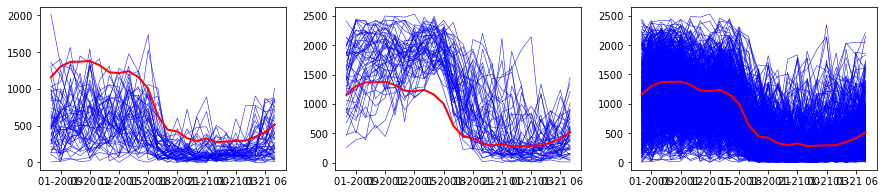

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

import numpy as np
LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

Fig 8: The scenarios those are generating highest 5% generation cost, highest 5% renewable curtailment and load shedding, how the scenarios are distributed with the mean of all scenarios. For those scenarios integration of the energy generation over 24 hrs is smaller than the integration of the energy generation for the mean of all scenarios. Fig 9 shows all the integration values and their distribution.

18611.103845999998
[10504.5878, 10910.5959, 9756.4613, 9519.7545, 9265.4094, 10889.8999, 8415.9383, 9485.7966, 8991.890000000001, 7547.8159, 9706.590799999998, 12685.3236, 9455.7179, 10976.2444, 9351.3793, 8495.689699999999, 9886.009999999998, 7683.4373000000005, 6700.7208, 12059.824, 9408.9755, 9983.8157, 8434.406500000001, 8814.5648, 8143.8972, 7130.4396, 9821.1183, 9765.7981, 8434.2579, 8715.0017, 9391.7496, 9506.6235, 9580.280600000002, 9100.1852, 8298.201500000001, 9680.2797, 7388.9906, 7854.0389, 8812.2817, 11513.6343, 7680.748, 8149.766, 4952.8925, 5995.6716, 8309.829600000001, 7086.355100000001, 5939.7243, 5231.328299999999, 4459.4263, 4061.2315999999996]


50

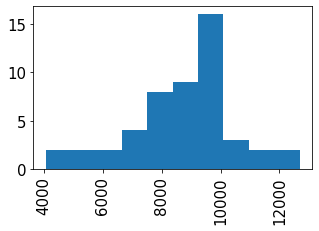

In [9]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
#ax.set_ylabel("Wind Histogram")
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
#ax.set_ylim([0, 800])
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
#plt.title('C')
sum(i < SumThresold for i in IntegrationScen)

Number of extreme scenarios causing higher generation cost: 15


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

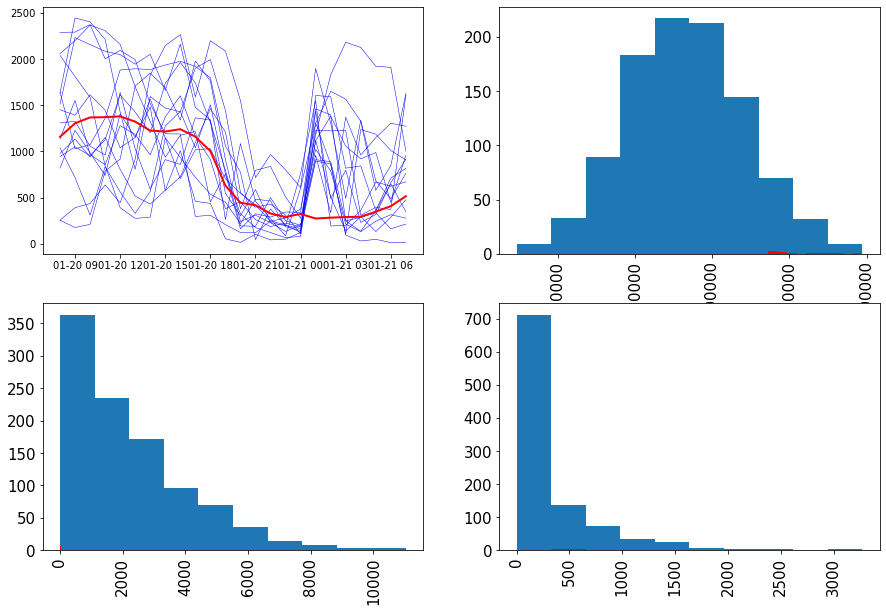

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,2,1)
jumpidx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    jump=DifferenceLoadWindSolar[time[17]][k]-DifferenceLoadWindSolar[time[16]][k]
    jump2=DifferenceLoadWindSolar[time[16]][k]
    if (jump>700):# and jump2>2800):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        jumpidx.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

print("Number of extreme scenarios causing higher generation cost:",len(jumpidx))
#print("The scenarios causing higher generation cost:", jumpidx)
HighGenCost=[]
for i in index:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in index:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)

ExtLoad=[]
for i in index:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)

The scenarios for which the integration over 24 hours are smaller compared to the integration for the thresold (mean) are the scenarios that generates high cost and Load shedding. For them the renewbale curtailment is low.

[9735.8933, 9859.6365, 8971.497200000002, 9819.3767, 9765.6506, 9952.5389, 9285.3078, 8693.610499999999, 9303.1924, 9319.9393, 9756.4613, 9519.7545, 9265.4094, 8415.9383, 9485.7966, 8991.890000000001, 7547.8159, 9706.590799999998, 9455.7179, 9351.3793, 8495.689699999999, 9886.009999999998, 7683.4373000000005, 6700.7208, 9408.9755, 9983.8157, 8434.406500000001, 8814.5648, 8143.8972, 7130.4396, 9821.1183, 9765.7981, 8434.2579, 8715.0017, 9391.7496, 9506.6235, 9580.280600000002, 9100.1852, 8298.201500000001, 9680.2797, 7388.9906, 7854.0389, 8812.2817, 7680.748, 8149.766, 4952.8925, 5995.6716, 8309.829600000001, 7086.355100000001, 5939.7243, 5231.328299999999, 4459.4263, 4061.2315999999996]
53


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

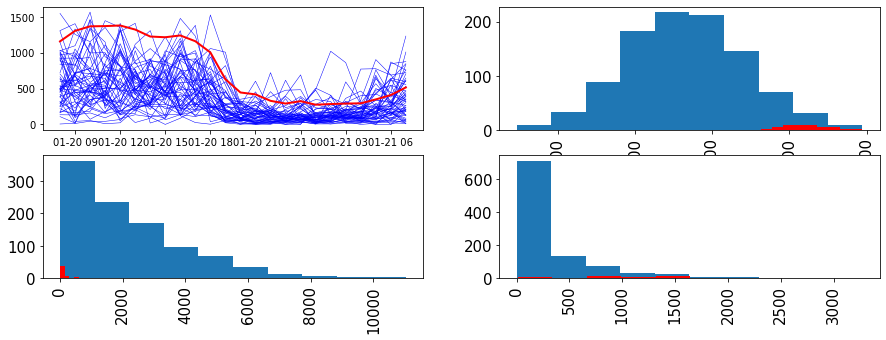

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,2,1)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    if (a<10000):
        IntegrationScen.append(a)
        ExtScenIdx.append(k)
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(IntegrationScen)
NumExtScen=sum(i < SumThresold for i in IntegrationScen)
print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in ExtScenIdx:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)
ExtLoad=[]
for i in ExtScenIdx:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)
#print(time)